In [2]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [3]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Creat a function to update clusters**

In [5]:
def update_centroids(k,nepochs,df):
  centroids=df.drop('species',axis=1).loc[np.random.randint(0,df.shape[0],k)].values
  Loss_per_epoch=np.zeros(nepochs)
  for n in range(nepochs):
    for ncluster in range(1,k+1):
      df[f'Cluster{ncluster}_distance']=pd.Series([np.linalg.norm(item-centroids[ncluster-1,:]) for item in df[list(df.columns[:4])].values])
    sel_col=[f'Cluster{j}_distance' for j in range(1,k+1)]
    df['Assigned Cluster']=pd.Series([np.argmin(df.iloc[i][sel_col])+1 for i in range(df.shape[0])])
    for j in range(1,k+1):
      centroids[j-1,:]=np.array(df[list(df.columns[:4])][df['Assigned Cluster']==j].mean())
    Loss_per_epoch[n]=sum([df[df['Assigned Cluster']==i][f'Cluster{i}_distance'].sum() for i in range(1,k+1)])
    #centroids[ncluster-1,:]=np.array(df[list(df.columns[:4])][df['Assigned Cluster']==(ncluster-1)].mean())
  tot_loss=sum([df[f'Cluster{i}_distance'].sum() for i in range(1,k+1)])
  inner_loss=sum([df[df['Assigned Cluster']==i][f'Cluster{i}_distance'].sum() for i in range(1,k+1)])
  outer_loss=tot_loss-inner_loss
  c=outer_loss/tot_loss
  return inner_loss,outer_loss,tot_loss,Loss_per_epoch,c,df
  

# Finding parameters for k=[5,10,20]

In [38]:
Lpe=np.zeros((10,3))
test_k=[20,10,5]
for i,k in enumerate(test_k):
  Il,Ol,Tl,Lpe[:,i],coeff,df=update_centroids(k,10,iris.copy())

#Final df for k=5

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster1_distance,Cluster2_distance,Cluster3_distance,Cluster4_distance,Cluster5_distance,Cluster6_distance,Cluster7_distance,Cluster8_distance,Cluster9_distance,Cluster10_distance,Cluster11_distance,Cluster12_distance,Cluster13_distance,Cluster14_distance,Cluster15_distance,Cluster16_distance,Cluster17_distance,Cluster18_distance,Cluster19_distance,Cluster20_distance,Assigned Cluster
0,5.1,3.5,1.4,0.2,setosa,0.498609,0.122354,0.717496,3.260188,4.089893,0.489100,2.649528,3.822012,2.376184,2.936972,3.827845,0.329983,4.075613,5.763137,0.387298,1.112430,4.673863,0.835913,0.424264,5.035197,2
1,4.9,3.0,1.4,0.2,setosa,0.394053,0.490260,0.506754,3.249435,4.047702,0.081968,2.604483,3.853714,2.167083,2.844922,3.882904,0.807603,4.042353,5.837701,0.678233,0.606218,4.709034,1.348610,0.931205,5.096501,6
2,4.7,3.2,1.3,0.2,setosa,0.280377,0.473499,0.242487,3.410525,4.194904,0.276981,2.784481,4.006800,2.341207,3.029709,4.063769,0.834000,4.226051,6.010720,0.793725,0.653835,4.873031,1.337442,0.876682,5.243609,3
3,4.6,3.1,1.5,0.2,setosa,0.212786,0.581418,0.338821,3.261064,4.033678,0.294480,2.640707,3.869683,2.152034,2.867291,3.949412,0.963789,4.076975,5.893110,0.866025,0.545436,4.741986,1.470969,0.975412,5.115976,1
4,5.0,3.6,1.4,0.2,setosa,0.478133,0.187004,0.686149,3.302851,4.124790,0.551560,2.704318,3.861059,2.426160,2.991696,3.883723,0.402768,4.129239,5.812379,0.500000,1.143460,4.718580,0.844837,0.385450,5.071258,2


#Plot loss vs number of epochs

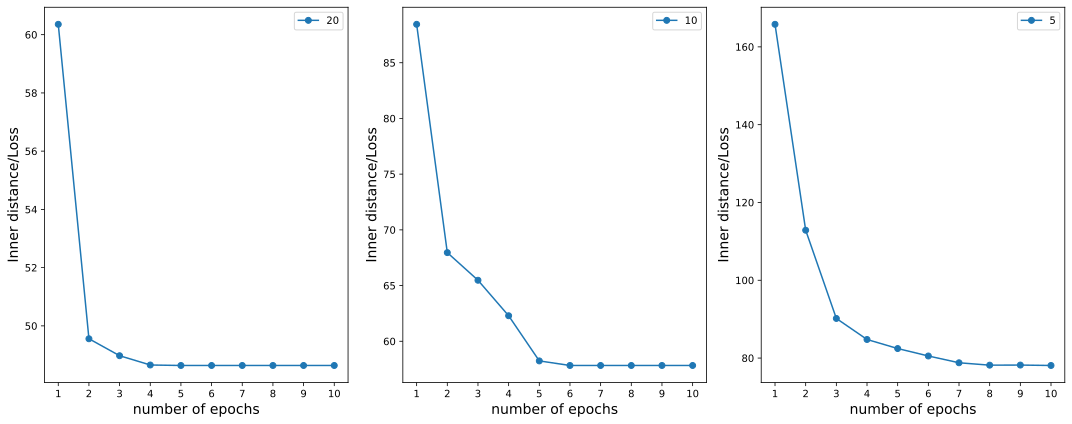

In [40]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
for i,ax in enumerate(axes):
  ax.plot(np.arange(1,11),Lpe[:,i],label=test_k[i],marker='o')
  ax.set_xticks(np.arange(1,11))
  ax.legend()
  ax.set_xlabel('number of epochs',size=14)
  ax.set_ylabel('Inner distance/Loss',size=14)
plt.tight_layout()


#Partitioning space for n-clusters=5

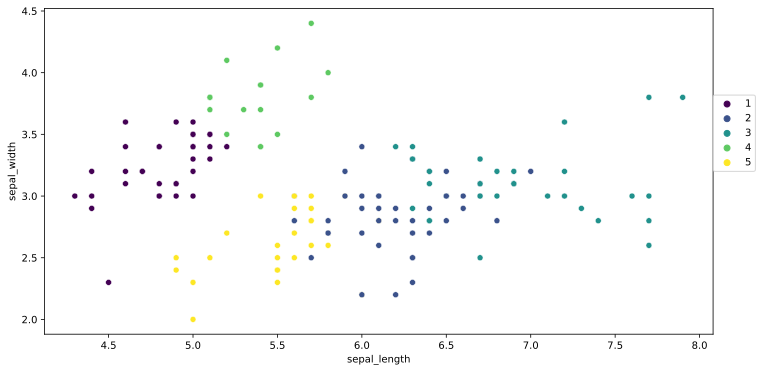

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='Assigned Cluster',palette='viridis')
plt.legend(loc=(1,0.5))

In [9]:
num_exp=10
Il=np.zeros((num_exp,3))
Ol=np.zeros(((num_exp,3)))
Tl=np.zeros((num_exp,3))
Coeff=np.zeros((num_exp,3))
for i,k in enumerate([5,10,20]):
  for j in range(num_exp):
    Il[j,i],Ol[j,i],Tl[j,i],Loss,Coeff[j,i],df=update_centroids(k,10,iris.copy())


In [10]:
Coeff

array([[0.94242739, 0.98500839, 0.99311631],
       [0.95604004, 0.98261505, 0.99405802],
       [0.95884087, 0.97935853, 0.99326364],
       [0.9590993 , 0.98447869, 0.9939116 ],
       [0.95934168, 0.98421663, 0.99332926],
       [0.9558384 , 0.98130593, 0.99378358],
       [0.95881071, 0.98483231, 0.99380407],
       [0.95872181, 0.98500476, 0.99256657],
       [0.95934168, 0.98472706, 0.99263797],
       [0.95858674, 0.98514642, 0.99383794]])

# Plot KDE over experiments

Text(0.5, 0, 'Ration(Outer distance / Totall distance)')

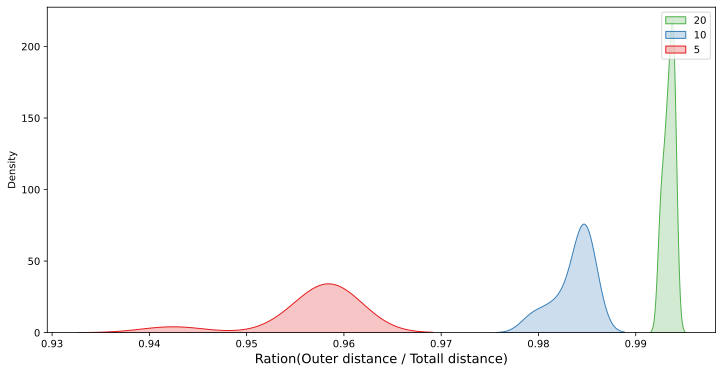

In [11]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=Coeff,shade=True,palette='Set1')
plt.legend([20,10,5])
plt.xlabel('Ration(Outer distance / Totall distance)',size=13)

#Plot Ratio over experiments

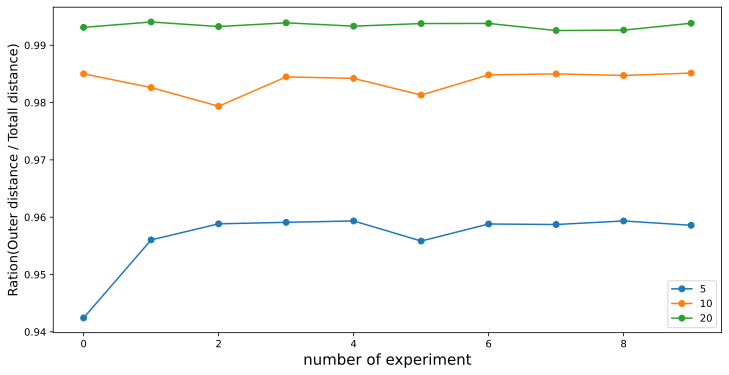

In [12]:
plt.figure(figsize=(12,6))
plt.plot(Coeff,marker='o')
plt.legend([5,10,20])
plt.ylabel('Ration(Outer distance / Totall distance)',size=13)
plt.xlabel('number of experiment',size=15);

#Calculate Mean and Variance over experiments

In [26]:
print(f"Mean of all experiments for 5,10,20 clustes are :{np.mean(Coeff,axis=0)}\n")
print(f"Variance of all experiments for 5,10,20 clustes are :{np.var(Coeff,axis=0)}")

Mean of all experiments for 5,10,20 clustes are :[0.95670486 0.98366938 0.9934309 ]

Variance of all experiments for 5,10,20 clustes are :[2.41284530e-05 3.44643520e-06 2.56675915e-07]


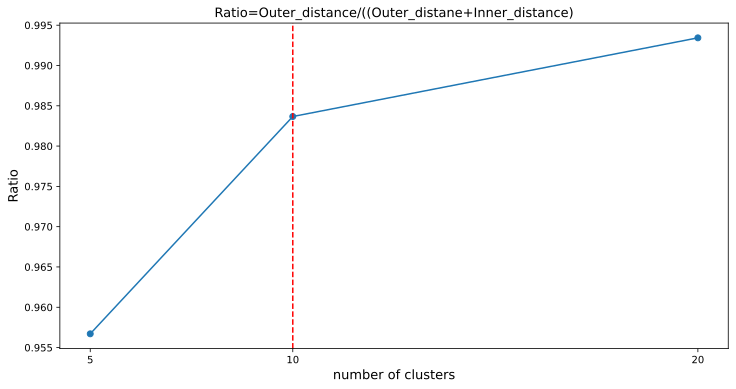

In [35]:
plt.figure(figsize=(12,6))
plt.plot([5,10,20],np.mean(Coeff,axis=0),marker='o')
plt.axvline(10, color='red',ls='--')
plt.xlabel('number of clusters',size=13)
plt.xticks([5,10,20])
plt.title('Ratio=Outer_distance/((Outer_distane+Inner_distance)',size=13)
plt.ylabel('Ratio',size=13);

#Plot Inner distance over experiments

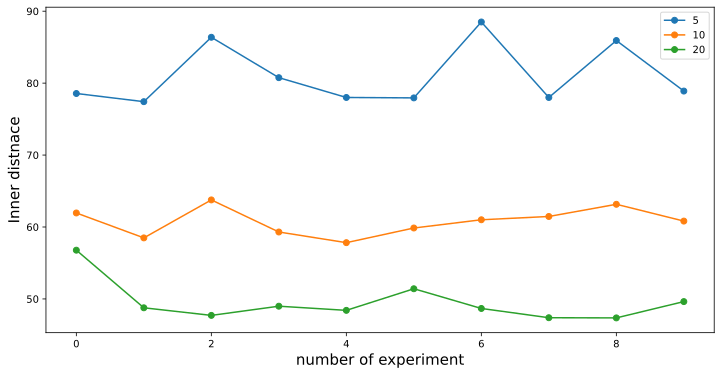

In [46]:
plt.figure(figsize=(12,6))
plt.plot(Il,marker='o')
plt.legend([5,10,20])
plt.xlabel('number of experiment',size=15)
plt.ylabel('Inner distnace',size=15);

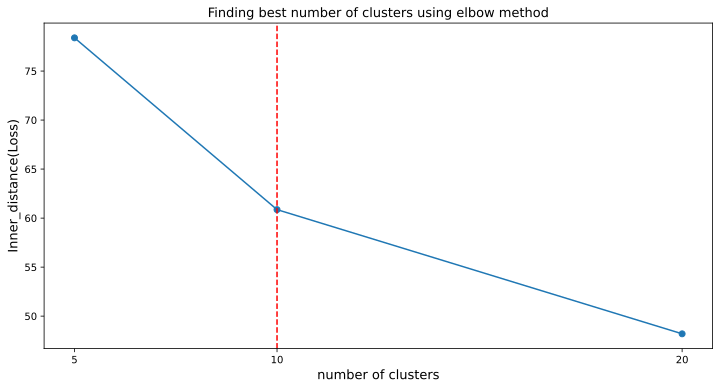

In [33]:
plt.figure(figsize=(12,6))
plt.plot([5,10,20],np.mean(Il,axis=0),marker='o')
plt.axvline(10, color='red',ls='--')
plt.xlabel('number of clusters',size=13)
plt.xticks([5,10,20])
plt.title('Finding best number of clusters using elbow method',size=13)
plt.ylabel('Inner_distance(Loss)',size=13);

#Plot Outer distance over experiments

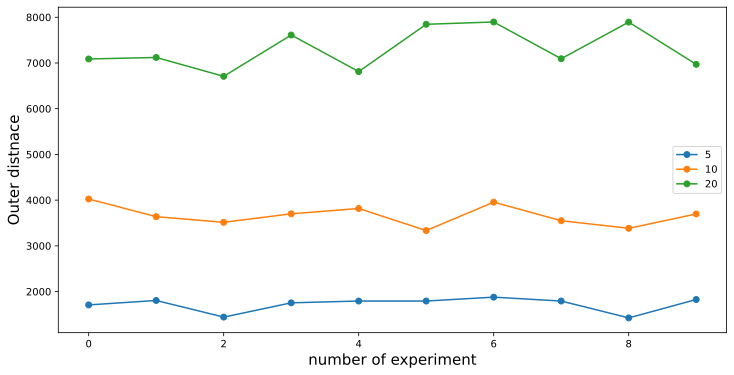

In [47]:
plt.figure(figsize=(12,6))
plt.plot(Ol,marker='o')
plt.legend([5,10,20])
plt.xlabel('number of experiment',size=15)
plt.ylabel('Outer distnace',size=15);

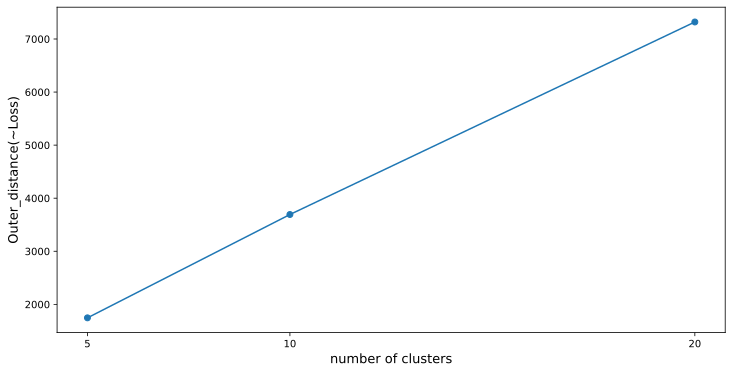

In [36]:
plt.figure(figsize=(12,6))
plt.plot([5,10,20],np.mean(Ol,axis=0),marker='o')
plt.xlabel('number of clusters',size=13)
plt.xticks([5,10,20])
plt.ylabel('Outer_distance(~Loss)',size=13);